In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to the Excel file
excel_file_path = "/content/drive/MyDrive/Pistachio_28_Features_Dataset.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

In [ ]:
print(df.describe())

                Area    Perimeter   Major_Axis   Minor_Axis  Eccentricity  \
count    2148.000000  2148.000000  2148.000000  2148.000000   2148.000000   
mean    79950.655493  1425.971751   446.248968   238.311842      0.840219   
std     13121.737799   375.565503    32.445304    30.310695      0.048759   
min     29808.000000   858.363000   320.344500   133.509600      0.504900   
25%     71936.750000  1170.996250   426.508750   217.875825      0.817500   
50%     79905.500000  1262.785500   448.574750   236.416350      0.849650   
75%     89030.500000  1607.906250   468.509400   257.760150      0.875200   
max    124008.000000  2755.049100   541.966100   383.046100      0.946000   

           Eqdiasq     Solidity    Convex_Area       Extent  Aspect_Ratio  \
count  2148.000000  2148.000000    2148.000000  2148.000000   2148.000000   
mean    317.919173     0.940093   85015.839851     0.716067      1.898154   
std      26.908600     0.050452   13154.919327     0.052532      0.240100  

In [ ]:
print(df['Class'].value_counts())

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: Class, dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

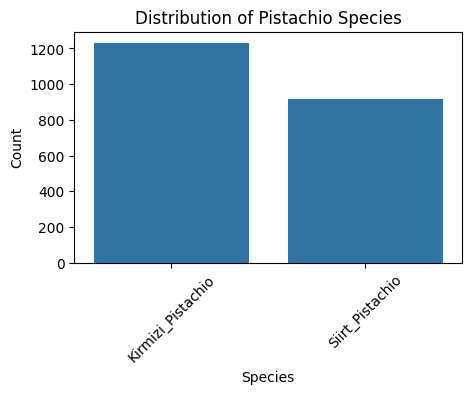

In [ ]:
# Plot the distribution of pistachio species
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Pistachio Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

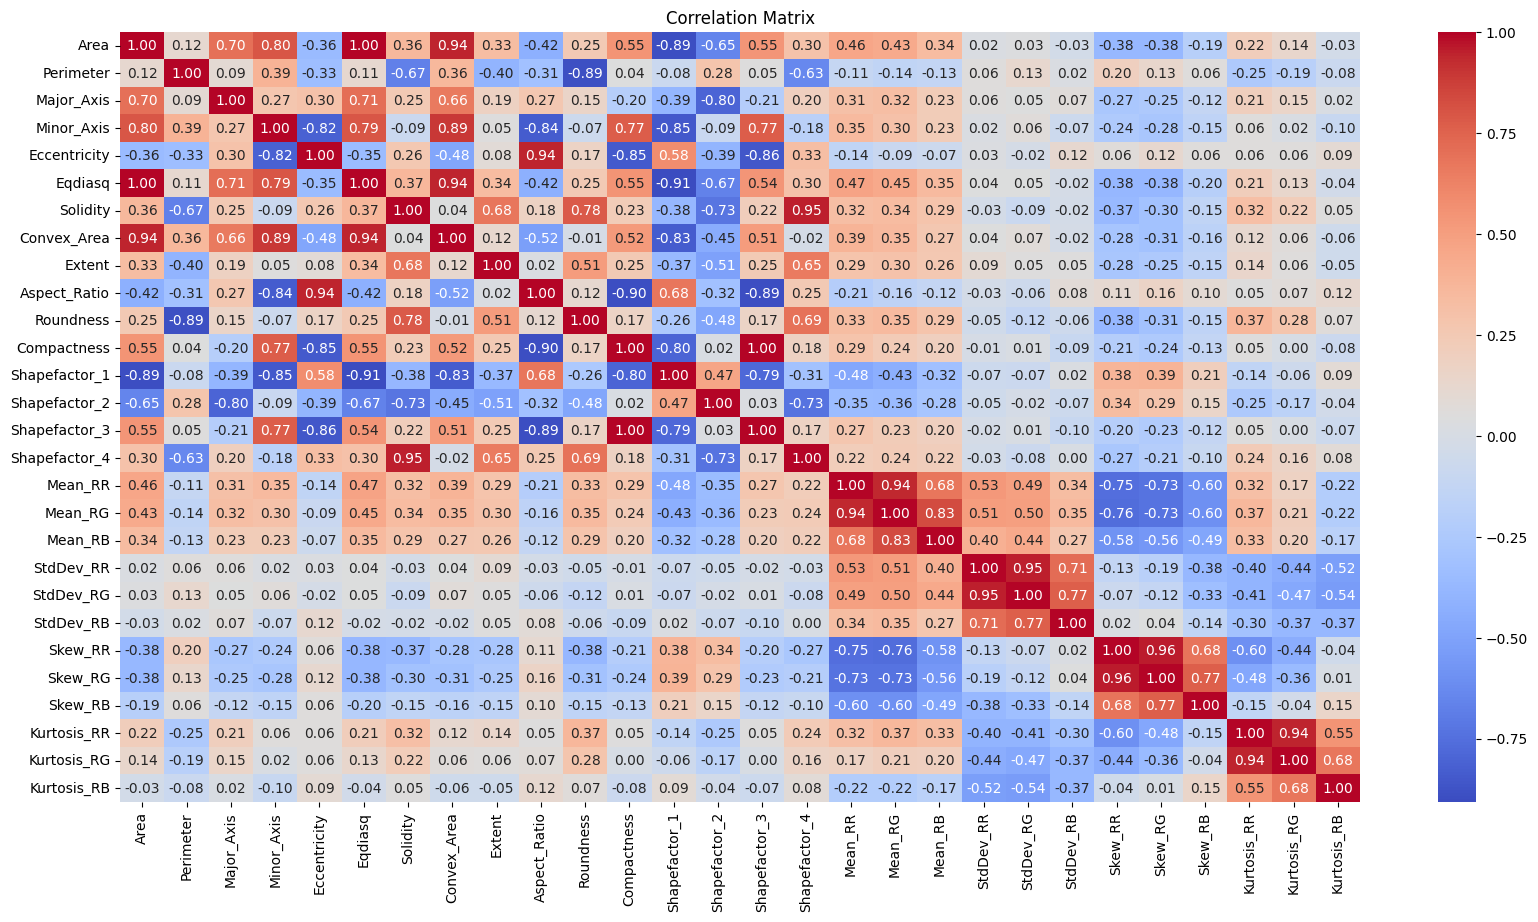

In [ ]:
# Calculate and visualize the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Print attribute pairs with correlation >= 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.9:
            attribute1 = corr_matrix.columns[i]
            attribute2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((attribute1, attribute2, correlation_value))

if high_corr_pairs:
    print("\nAttribute pairs with correlation >= 0.9:")
    for pair in high_corr_pairs:
        print(pair)
else:
    print("\nNo attribute pairs with correlation >= 0.9 found.")


Attribute pairs with correlation >= 0.9:
('Area', 'Eqdiasq', 0.9973986547231531)
('Area', 'Convex_Area', 0.9438771151478195)
('Eccentricity', 'Aspect_Ratio', 0.9437509470125018)
('Eqdiasq', 'Convex_Area', 0.9406511887825222)
('Eqdiasq', 'Shapefactor_1', -0.9068925585877248)
('Solidity', 'Shapefactor_4', 0.9495013738767331)
('Compactness', 'Shapefactor_3', 0.9986254240151958)
('Mean_RR', 'Mean_RG', 0.9370118558333667)
('StdDev_RR', 'StdDev_RG', 0.9481582253371389)
('Skew_RR', 'Skew_RG', 0.9587676936246609)
('Kurtosis_RR', 'Kurtosis_RG', 0.9429289539964331)


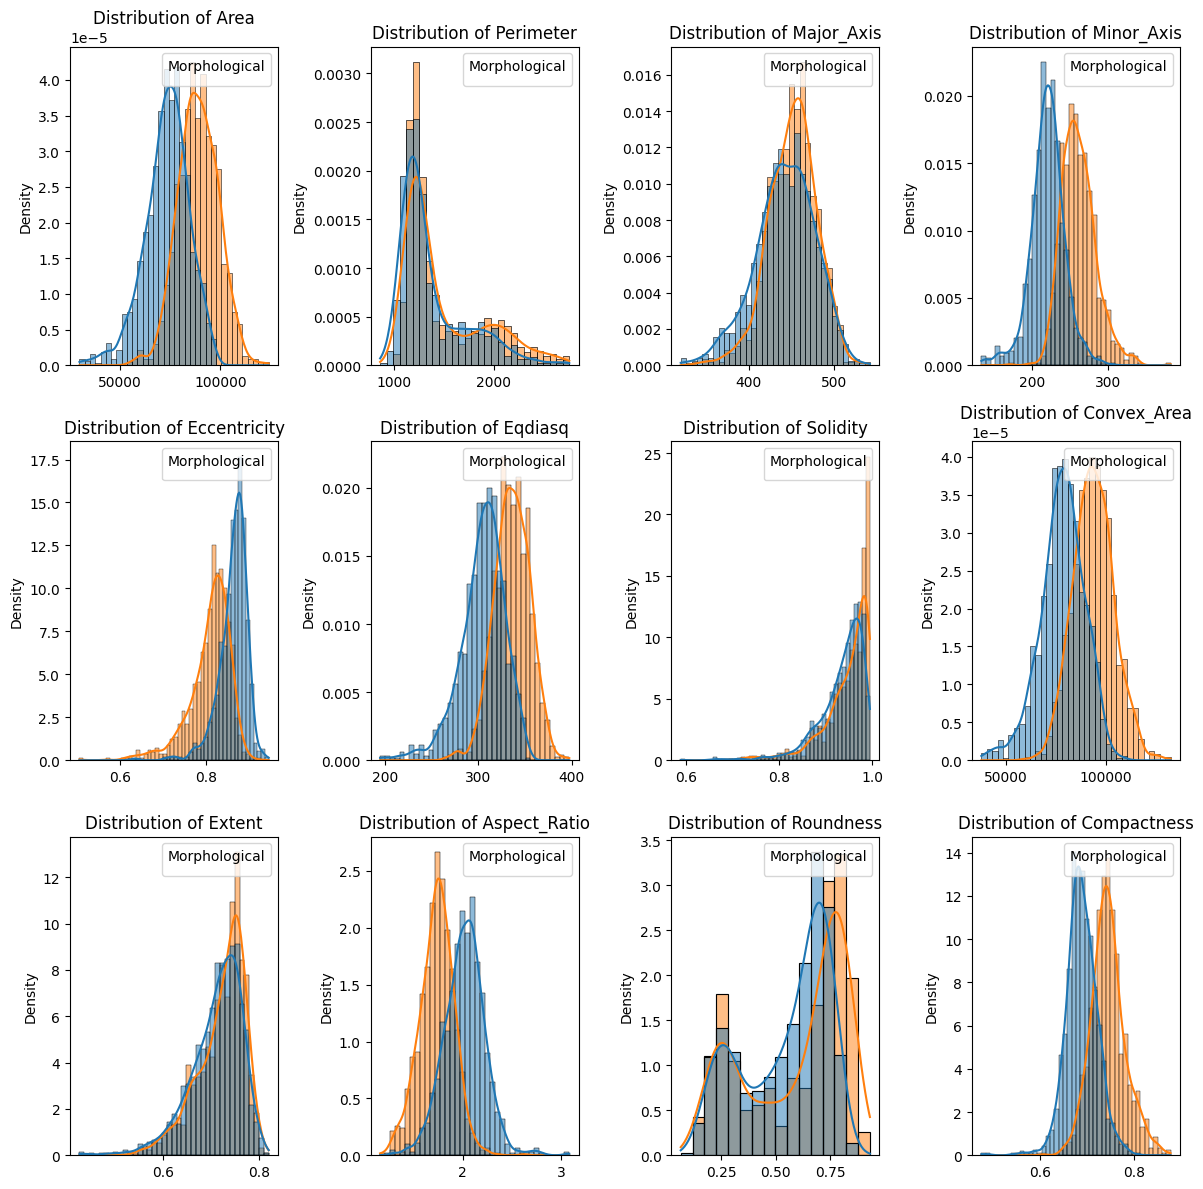

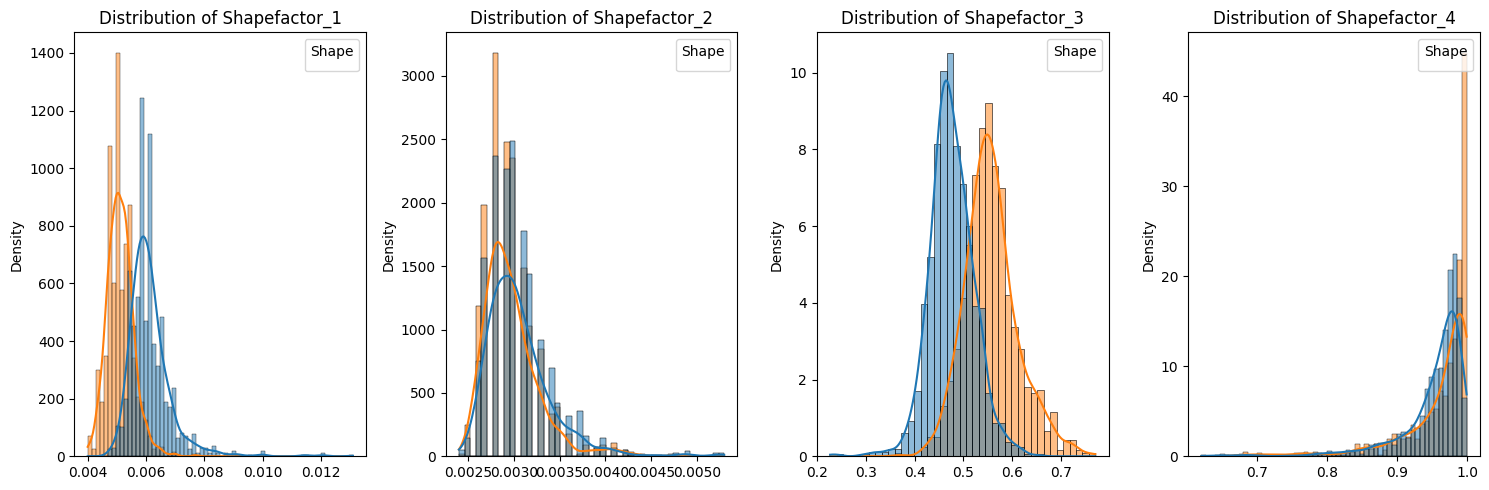

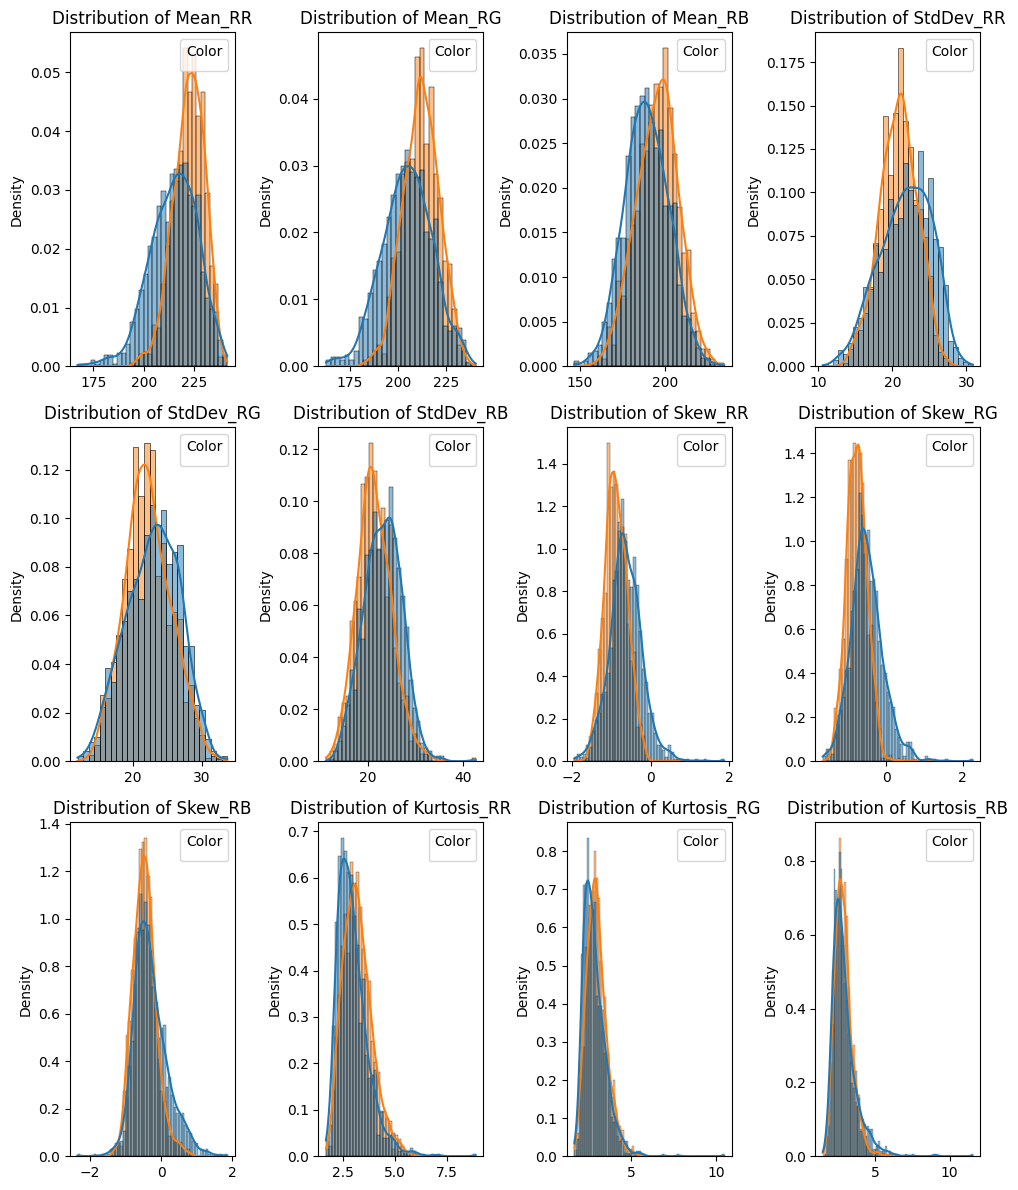

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

attributes  = ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness']
num_features = len(attributes)
num_rows = (num_features - 1) // 4 + 1  # Calculate the number of rows needed

plt.figure(figsize=(12, 4 * num_rows))  # Adjust the figure height based on the number of rows
for i, feature in enumerate(attributes):
    plt.subplot(num_rows, 4, i+1)  # Adjust the subplot indexing
    sns.histplot(data=df, x=feature, hue='Class', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Density')
    plt.legend(title='Morphological', loc='upper right')
plt.tight_layout()
plt.show()

attributes  = ['Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4']
num_features = len(attributes)
num_rows = (num_features - 1) // 4 + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure height based on the number of rows
for i, feature in enumerate(attributes):
    plt.subplot(num_rows, 4, i+1)  # Adjust the subplot indexing
    sns.histplot(data=df, x=feature, hue='Class', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Density')
    plt.legend(title='Shape', loc='upper right')
plt.tight_layout()
plt.show()

attributes  = ['Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']
num_features = len(attributes)
num_rows = (num_features - 1) // 4 + 1  # Calculate the number of rows needed

plt.figure(figsize=(10, 4 * num_rows))  # Adjust the figure height based on the number of rows
for i, feature in enumerate(attributes):
    plt.subplot(num_rows, 4, i+1)  # Adjust the subplot indexing
    sns.histplot(data=df, x=feature, hue='Class', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Density')
    plt.legend(title='Color', loc='upper right')
plt.tight_layout()
plt.savefig('distribution_plot.png')
plt.show()


In [ ]:
print(df.isnull().sum())

Area             0
Perimeter        0
Major_Axis       0
Minor_Axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Convex_Area      0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Mean_RR          0
Mean_RG          0
Mean_RB          0
StdDev_RR        0
StdDev_RG        0
StdDev_RB        0
Skew_RR          0
Skew_RG          0
Skew_RB          0
Kurtosis_RR      0
Kurtosis_RG      0
Kurtosis_RB      0
Class            0
dtype: int64


## Clean the data

In [ ]:
df = df.drop([ 'Perimeter', 'Major_Axis', 'Eccentricity','Eqdiasq', 'Solidity', 'Convex_Area','Compactness','Shapefactor_2',
              'Mean_RR', 'Mean_RG', 'Mean_RB', 'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
              'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB'], axis=1)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Minor_Axis     2148 non-null   float64
 2   Extent         2148 non-null   float64
 3   Aspect_Ratio   2148 non-null   float64
 4   Roundness      2148 non-null   float64
 5   Shapefactor_1  2148 non-null   float64
 6   Shapefactor_3  2148 non-null   float64
 7   Shapefactor_4  2148 non-null   float64
 8   Class          2148 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 151.2+ KB
None


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
X = df.drop('Class', axis=1)
y = df['Class']
# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Find which class corresponds to label 0 and label 1
class_0 = label_encoder.inverse_transform([0])[0]
class_1 = label_encoder.inverse_transform([1])[0]

print("Class corresponding to label 0:", class_0)
print("Class corresponding to label 1:", class_1)
# Original data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Class corresponding to label 0: Kirmizi_Pistachio
Class corresponding to label 1: Siirt_Pistachio


In [ ]:
# Normalized dataset
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
# Standardized dataset
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

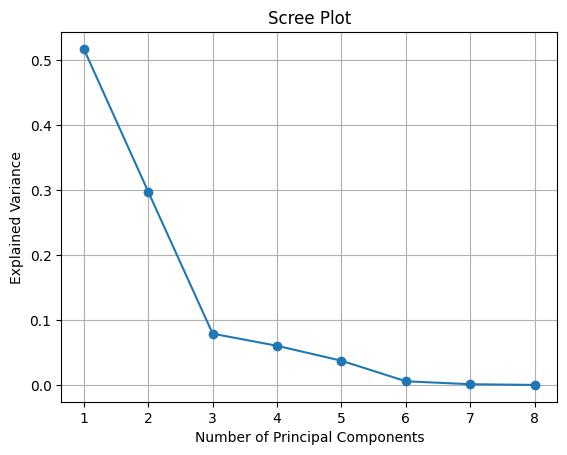

In [ ]:
#apply PCA to find the principal components, it and transform the train set and transform the test dataset
#importing library for PCA
from sklearn.decomposition import PCA
#importing lda library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

#generate Scree plot
explained_variance = pca.explained_variance_ratio_
#plot the Scree plot
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
# PCA reduction
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

In [ ]:
# LDA reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_standardized, y_train)
X_test_lda = lda.transform(X_test_standardized)

In [ ]:
#Class Imbalancehandling by SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# SMOTE data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_standardized, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_standardized, y_test)

In [ ]:
def outlier_detection(X_train):
    # Detect outliers using Local Outlier Factor
    lof = LocalOutlierFactor()
    outliers_lof = lof.fit_predict(X_train)

    # Detect outliers using Isolation Forest
    isf = IsolationForest(contamination=0.05)
    outliers_isf = isf.fit_predict(X_train)

    # Detect outliers using One-Class SVM
    ocsvm = OneClassSVM(nu=0.05)
    outliers_ocsvm = ocsvm.fit_predict(X_train)

    return outliers_lof, outliers_isf, outliers_ocsvm

In [ ]:
def classification(X_train, X_test, y_train, y_test):
    # Perform classification using kNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_report = classification_report(y_test, knn_pred)

    # Perform classification using Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    dt_report = classification_report(y_test, dt_pred)

    # Perform classification using Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_report = classification_report(y_test, rf_pred)

    # Perform classification using Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_report = classification_report(y_test, nb_pred)

    # Perform classification using Support Vector Machine
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_report = classification_report(y_test, svm_pred)

    # Perform classification using Multi-Layer Perceptron
    mlp = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    mlp_pred_proba = mlp.predict(X_test)
    mlp_pred = np.round(mlp_pred_proba).flatten()
    mlp_report = classification_report(y_test, mlp_pred)

    return knn_report, dt_report, rf_report, nb_report, svm_report, mlp_report

In [ ]:
def clustering(X_train):

    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=2)
    kmeans_labels = kmeans.fit_predict(X_train)

    # Perform clustering using DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_train)

    # Perform clustering using Expectation Maximization (Gaussian Mixture Model)
    em = GaussianMixture(n_components=2)
    em_labels = em.fit_predict(X_train)

    return dbscan_labels, em_labels, kmeans_labels


In [ ]:
datasets = {
    "Original": (X_train, X_test, y_train, y_test),
    "Normalized": (X_train_normalized, X_test_normalized, y_train, y_test),
    "Standardized": (X_train_standardized, X_test_standardized, y_train, y_test),
    "PCA Reduction": (X_train_pca, X_test_pca, y_train, y_test),
    "LDA Reduction": (X_train_lda, X_test_lda, y_train, y_test),
    "SMOTE": (X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled),
}

# Dictionaries to store results
outlier_results = {}
classification_results = {}
clustering_results = {}

for name, (X_train_data, X_test_data, y_train, y_test) in datasets.items():
    print(f"\n{name} Dataset:")
    # Outlier detection
    outliers_lof, outliers_iso, outliers_ocsvm = outlier_detection(X_train_data)
    outlier_results[name] = {
        "LOF": outliers_lof,
        "ISO": outliers_iso,
        "OCSVM": outliers_ocsvm
    }

    # Classification
    dt_report, knn_report, rf_report, nb_report, svm_report, mlp_report = classification(X_train_data, X_test_data, y_train, y_test)
    classification_results[name] = {
        "DT": dt_report,
        "kNN": knn_report,
        "RF": rf_report,
        "NB": nb_report,
        "SVM": svm_report,
        "MLP": mlp_report
    }

    # Clustering
    dbscan_labels, em_labels, kmeans_labels = clustering(X_train_data)
    clustering_results[name] = {
        "DBSCAN": dbscan_labels,
        "EM": em_labels,
        "KMeans": kmeans_labels
    }


Original Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


14/14 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.


Normalized Dataset:
14/14 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Standardized Dataset:
14/14 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



PCA Reduction Dataset:
14/14 [==============================] - 0s 2ms/step

LDA Reduction Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14/14 [==============================] - 0s 2ms/step

SMOTE Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Analyzing Outlier Detection Results
for dataset_name, outlier_result in outlier_results.items():
    print(f"\nOutlier Detection Results for {dataset_name} Dataset:")
    for method, outliers in outlier_result.items():
        print(f"{method} Outliers Detected: {np.sum(outliers == -1)}")

# Analyzing Classification Results
for dataset_name, classification_result in classification_results.items():
    print(f"\nClassification Results for {dataset_name} Dataset:")
    for classifier, report in classification_result.items():
        print(f"\n{classifier} Classifier Report:")
        print(report)

# Analyzing Clustering Results
for dataset_name, clustering_result in clustering_results.items():
    print(f"\nClustering Results for {dataset_name} Dataset:")

    # Assessing cluster sizes
    kmeans_cluster_sizes = np.bincount(clustering_result["KMeans"])
    dbscan_cluster_sizes = np.bincount(clustering_result["DBSCAN"] + 1)  # Adding 1 to include noise points
    em_cluster_sizes = np.bincount(clustering_result["EM"])

    print(f"Cluster Sizes - KMeans: {kmeans_cluster_sizes}, DBSCAN: {dbscan_cluster_sizes}, EM: {em_cluster_sizes}")



Outlier Detection Results for Original Dataset:
LOF Outliers Detected: 10
ISO Outliers Detected: 86
OCSVM Outliers Detected: 87

Outlier Detection Results for Normalized Dataset:
LOF Outliers Detected: 23
ISO Outliers Detected: 86
OCSVM Outliers Detected: 87

Outlier Detection Results for Standardized Dataset:
LOF Outliers Detected: 25
ISO Outliers Detected: 86
OCSVM Outliers Detected: 86

Outlier Detection Results for PCA Reduction Dataset:
LOF Outliers Detected: 36
ISO Outliers Detected: 86
OCSVM Outliers Detected: 87

Outlier Detection Results for LDA Reduction Dataset:
LOF Outliers Detected: 15
ISO Outliers Detected: 86
OCSVM Outliers Detected: 167

Outlier Detection Results for SMOTE Dataset:
LOF Outliers Detected: 29
ISO Outliers Detected: 99
OCSVM Outliers Detected: 96

Classification Results for Original Dataset:

DT Classifier Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.79       244
           1       0.75      0.65 


Outlier Detection Results for Original Dataset:
LOF Outliers Detected: 10
ISO Outliers Detected: 86
OCSVM Outliers Detected: 87


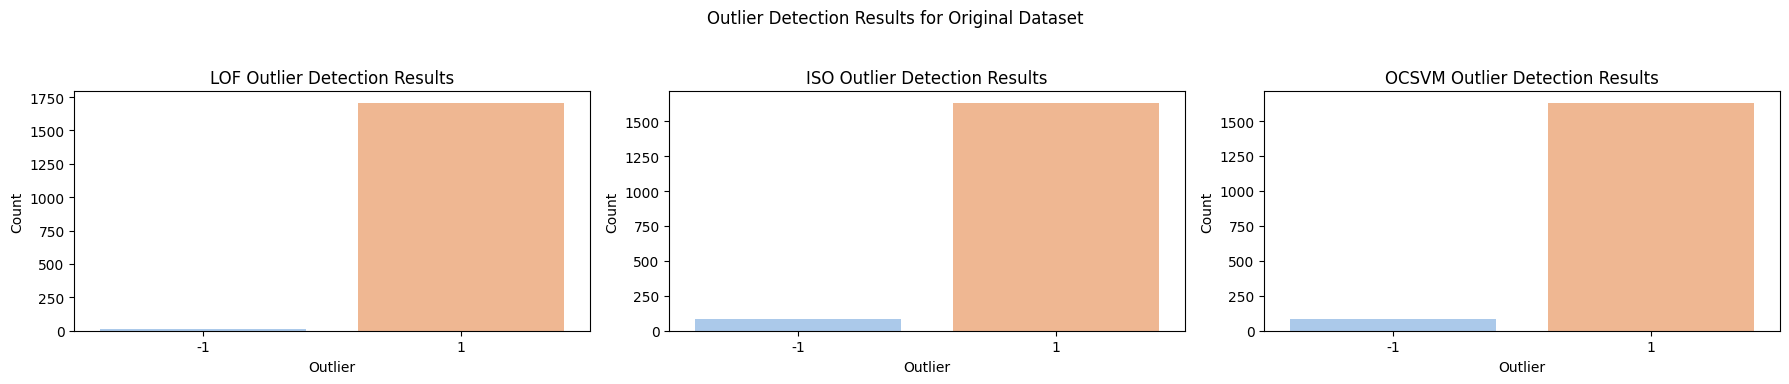


Outlier Detection Results for Normalized Dataset:
LOF Outliers Detected: 23
ISO Outliers Detected: 86
OCSVM Outliers Detected: 87


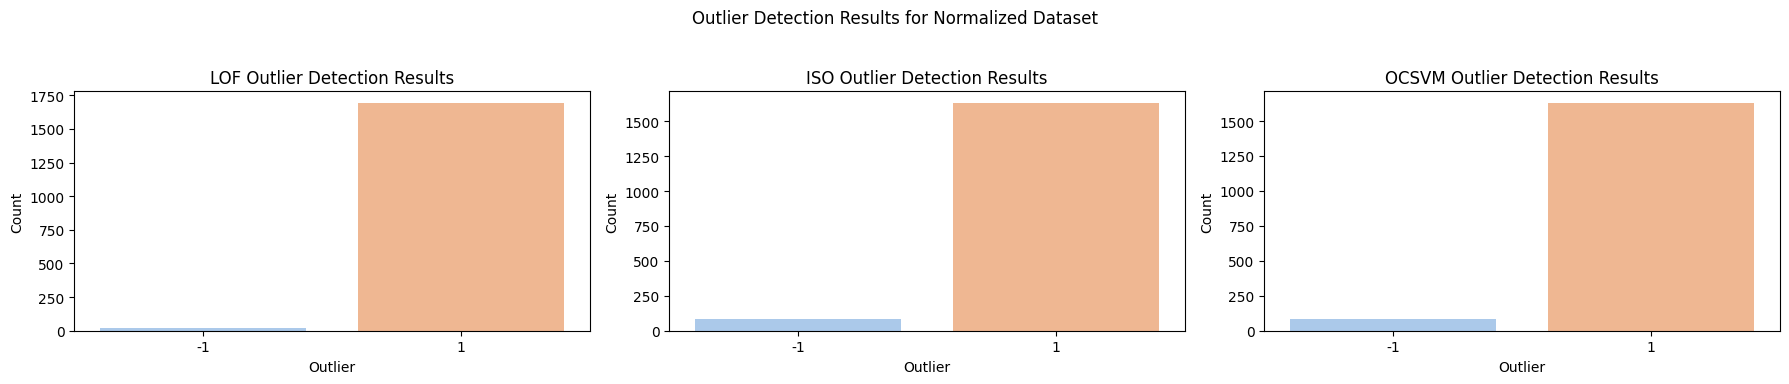


Outlier Detection Results for Standardized Dataset:
LOF Outliers Detected: 25
ISO Outliers Detected: 86
OCSVM Outliers Detected: 86


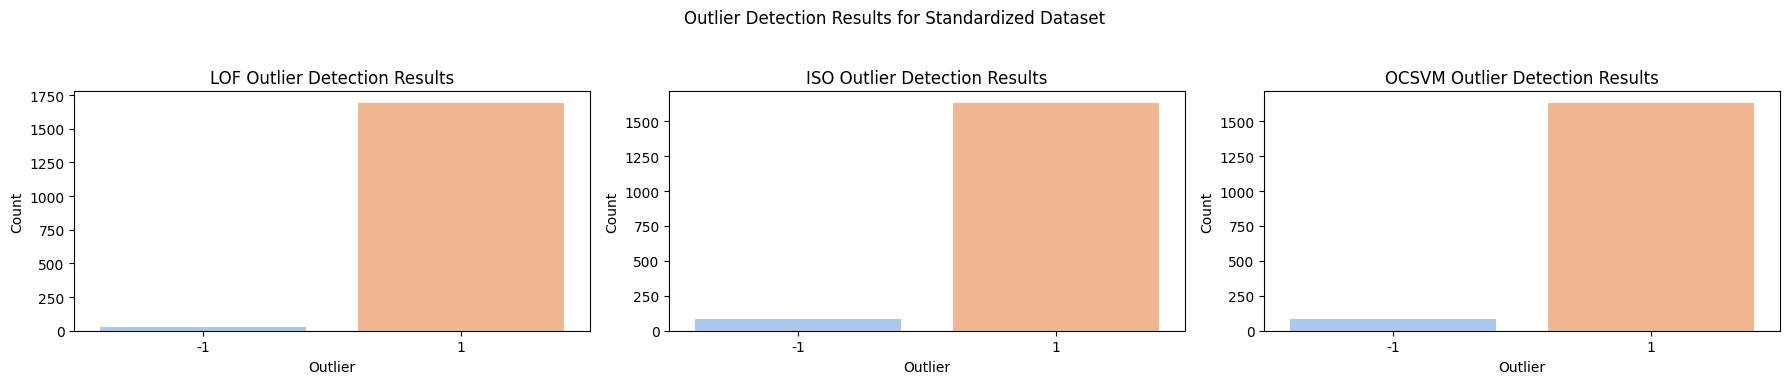


Outlier Detection Results for PCA Reduction Dataset:
LOF Outliers Detected: 36
ISO Outliers Detected: 86
OCSVM Outliers Detected: 87


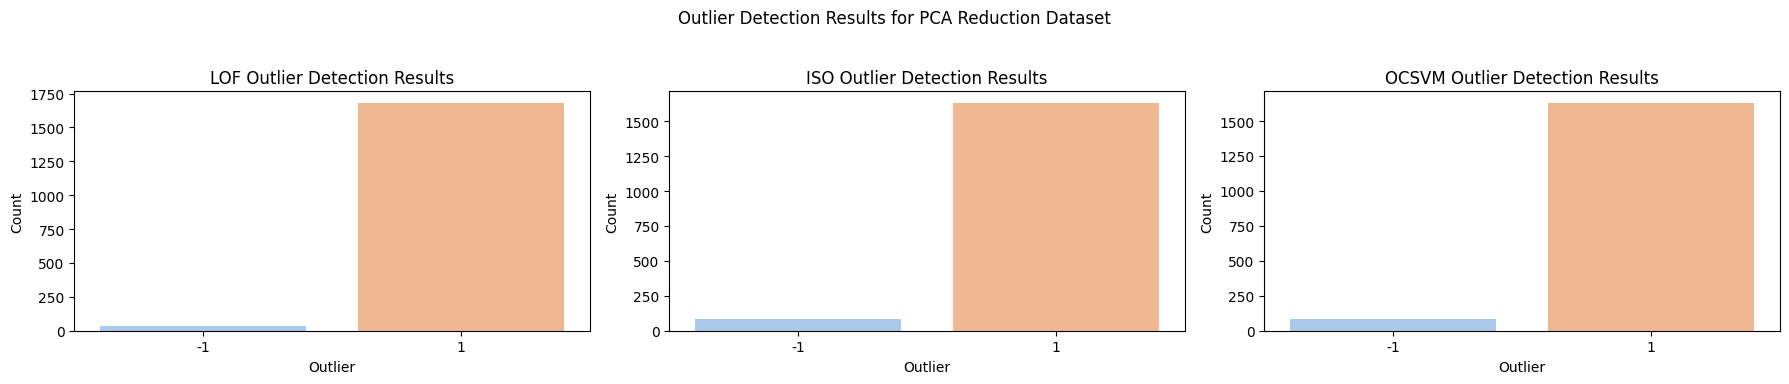


Outlier Detection Results for LDA Reduction Dataset:
LOF Outliers Detected: 15
ISO Outliers Detected: 86
OCSVM Outliers Detected: 167


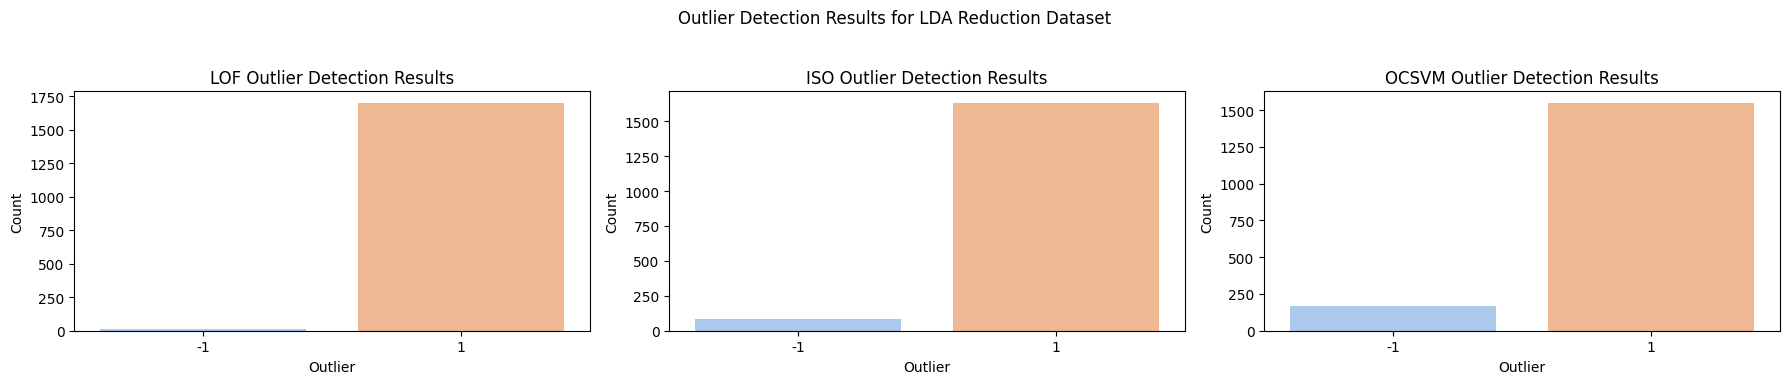


Outlier Detection Results for SMOTE Dataset:
LOF Outliers Detected: 29
ISO Outliers Detected: 99
OCSVM Outliers Detected: 96


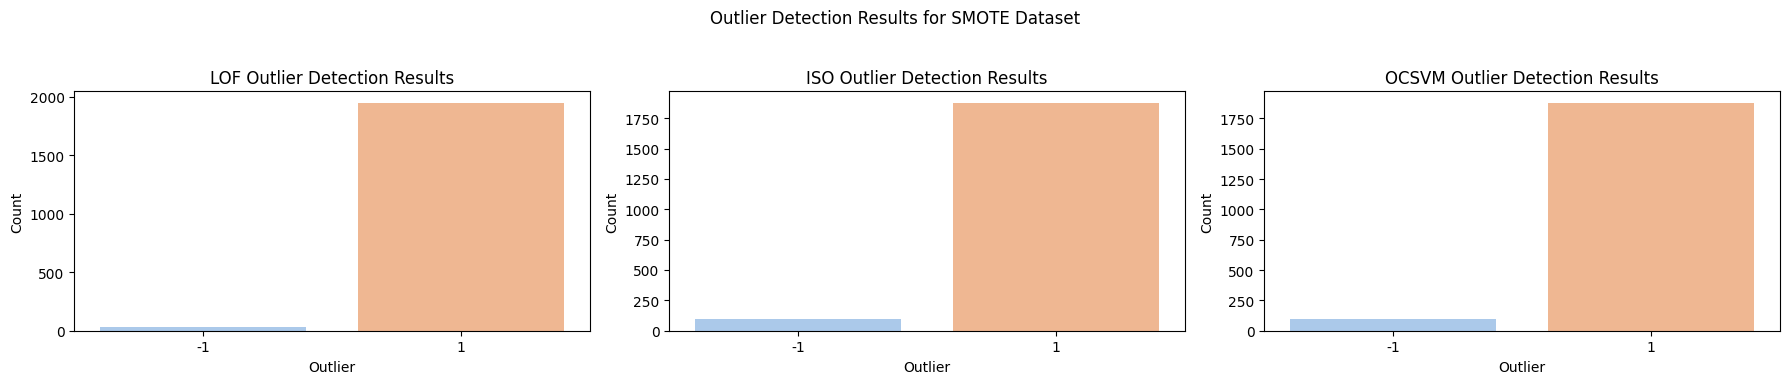

In [ ]:
# Outlier Detection Visualization (Splitting into Different Graphs)
for dataset_name, outlier_result in outlier_results.items():
    print(f"\nOutlier Detection Results for {dataset_name} Dataset:")
    plt.figure(figsize=(18, 4))
    for i, (method, outliers) in enumerate(outlier_result.items(), start=1):
        print(f"{method} Outliers Detected: {np.sum(outliers == -1)}")
        plt.subplot(1, 3, i)
        sns.countplot(x="outlier", hue=outliers, data={"outlier": outliers}, palette="pastel", legend=False)
        plt.title(f"{method} Outlier Detection Results")
        plt.xlabel("Outlier")
        plt.ylabel("Count")
    plt.suptitle(f"Outlier Detection Results for {dataset_name} Dataset")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Classification Results for Original Dataset:


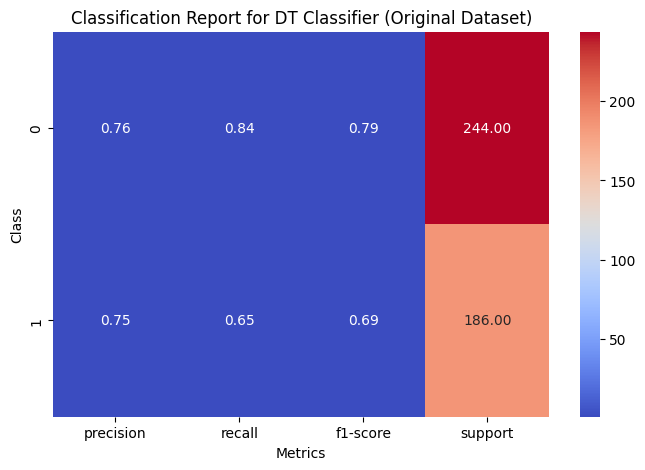

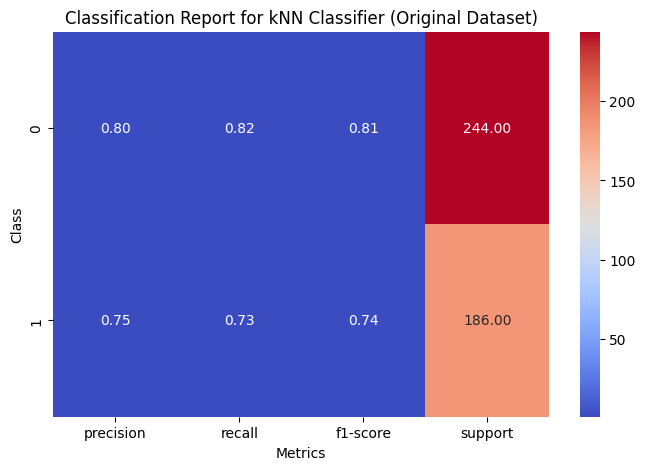

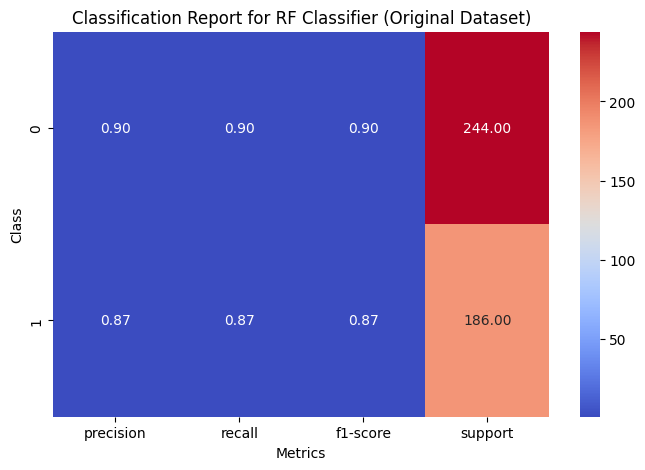

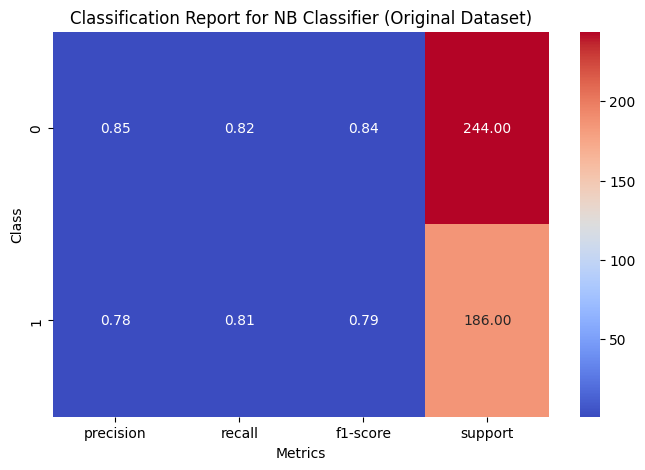

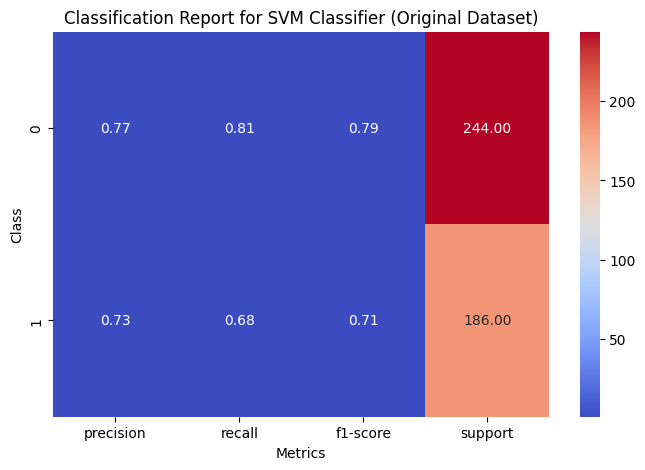

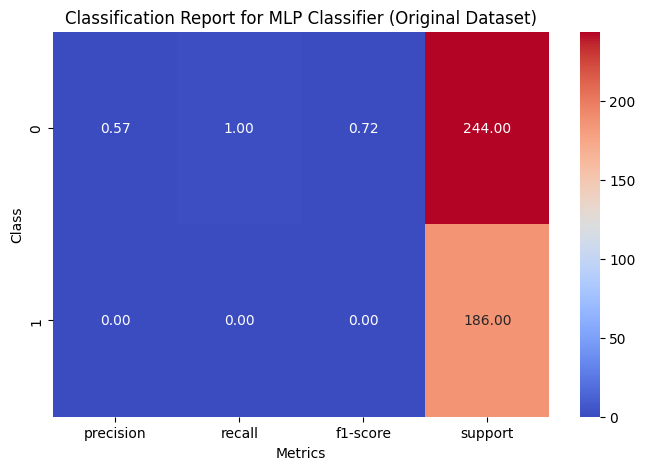


Classification Results for Normalized Dataset:


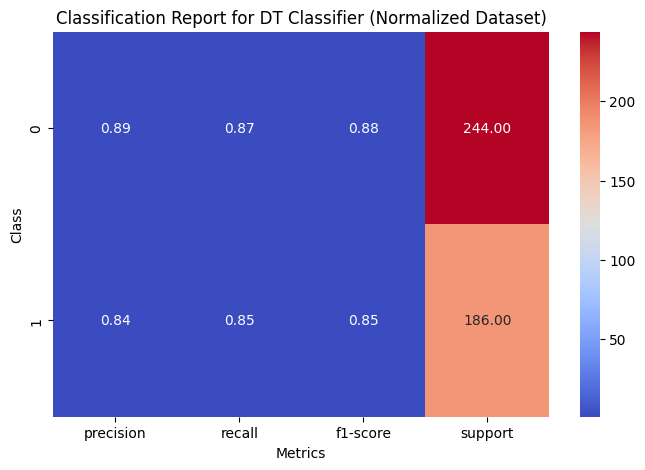

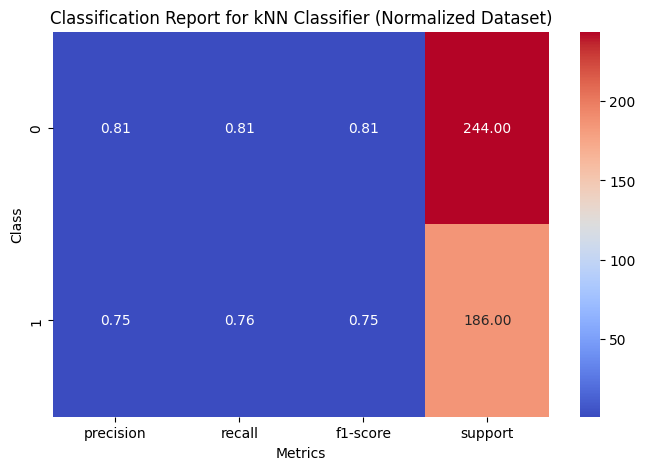

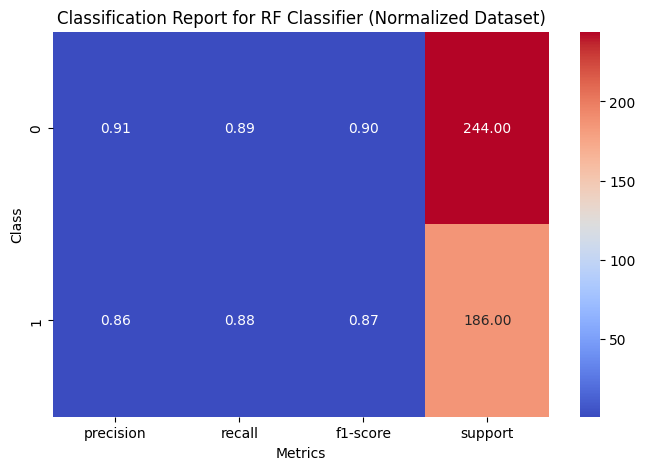

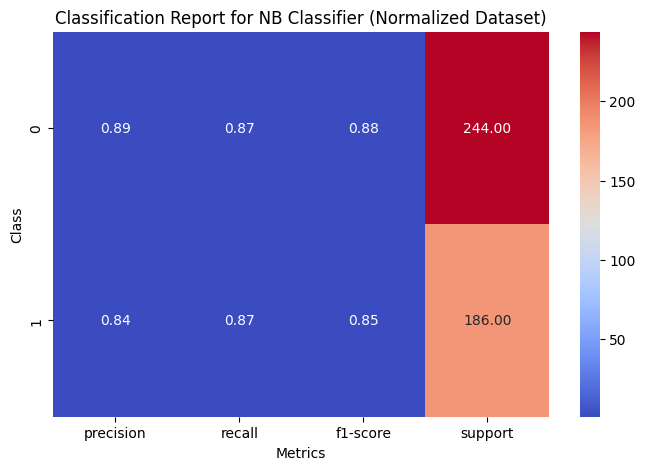

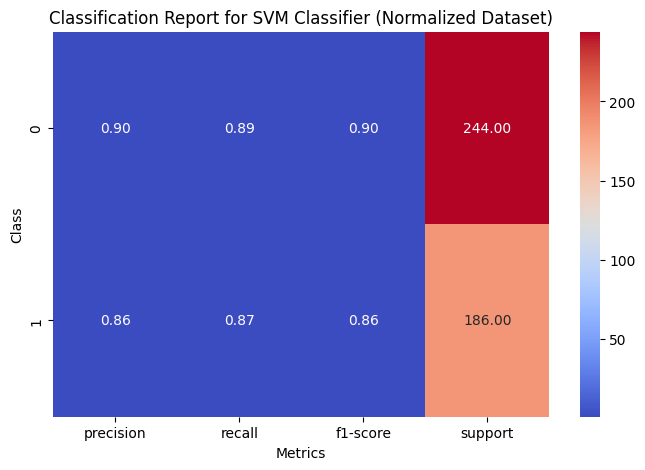

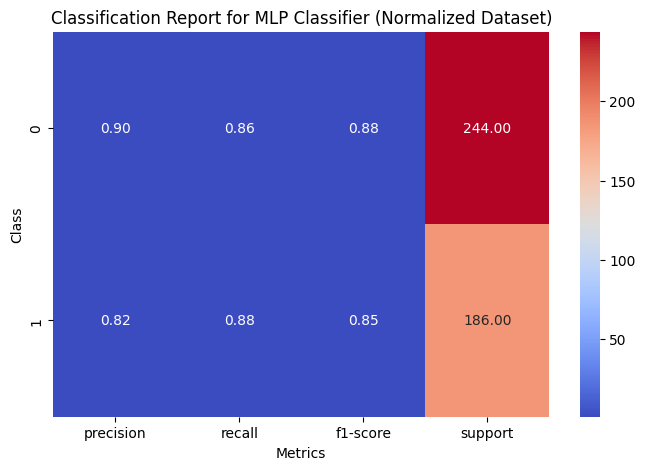


Classification Results for Standardized Dataset:


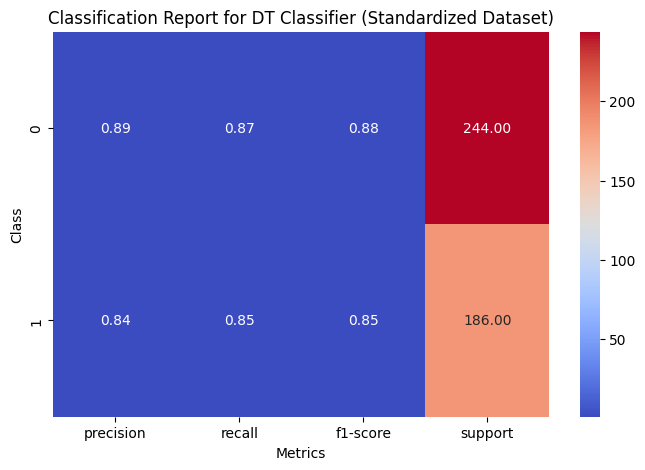

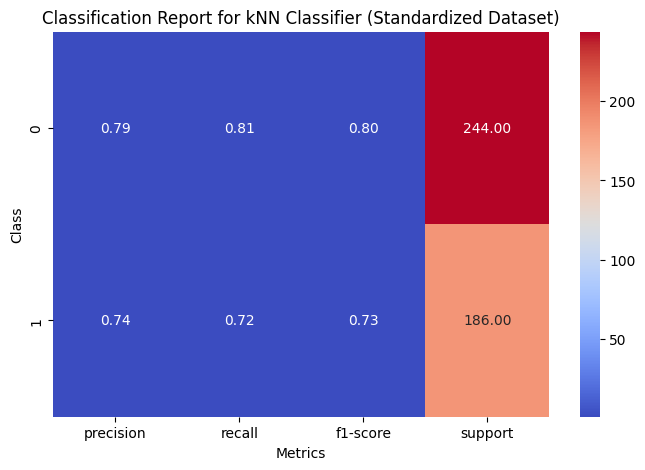

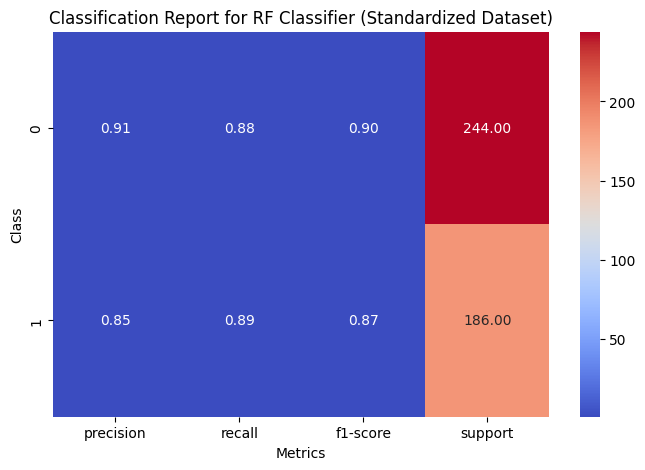

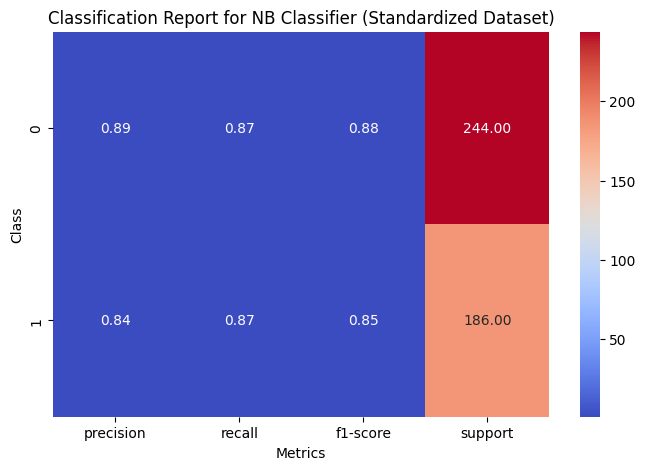

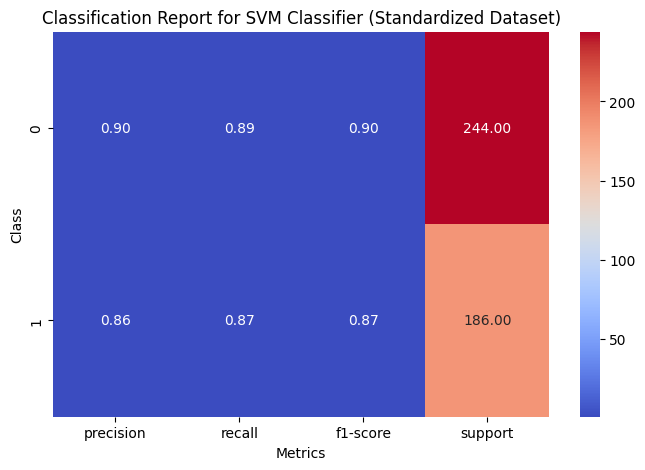

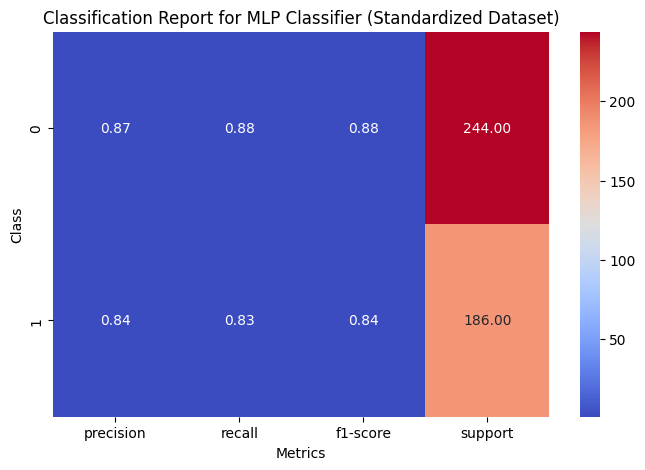


Classification Results for PCA Reduction Dataset:


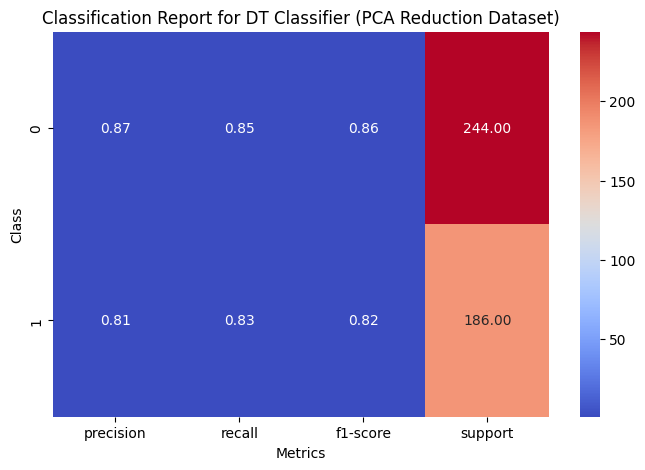

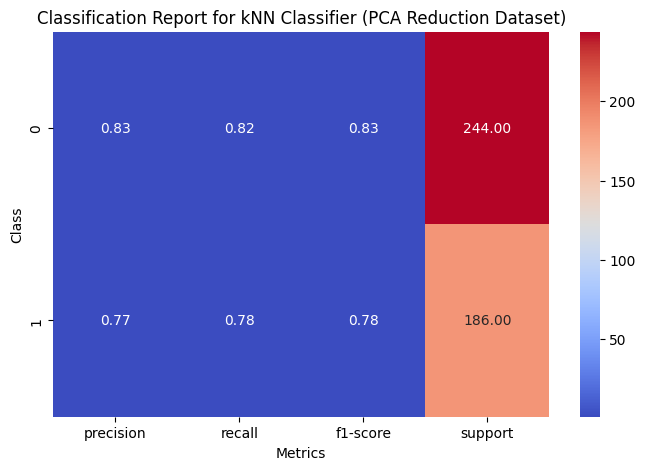

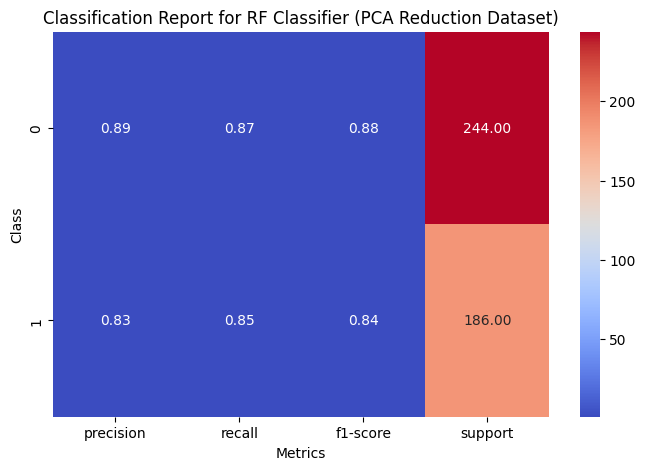

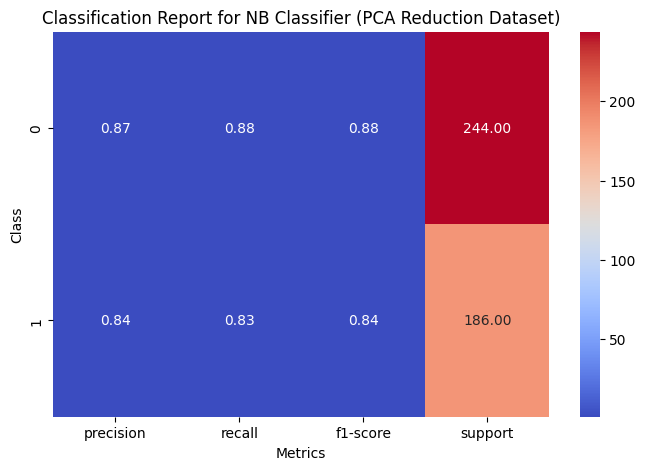

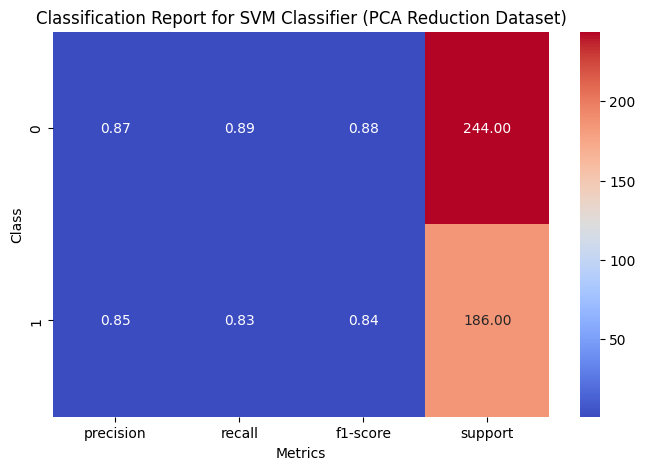

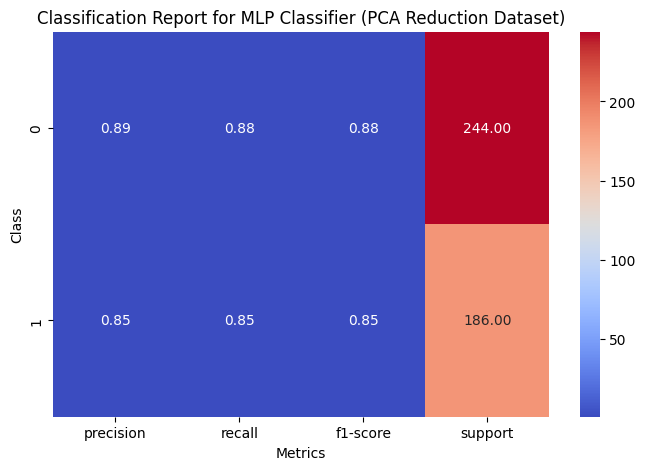


Classification Results for LDA Reduction Dataset:


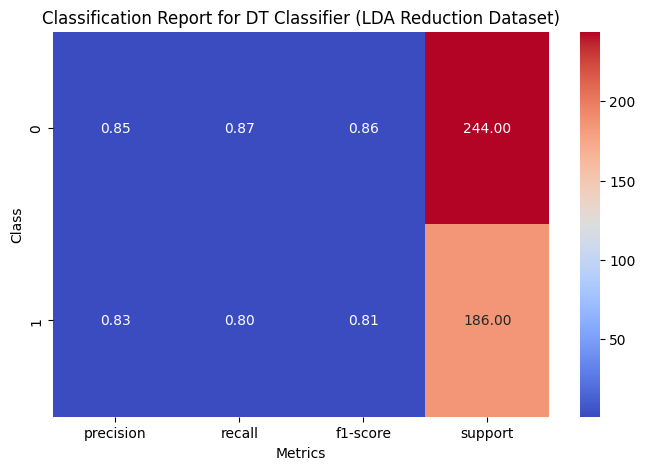

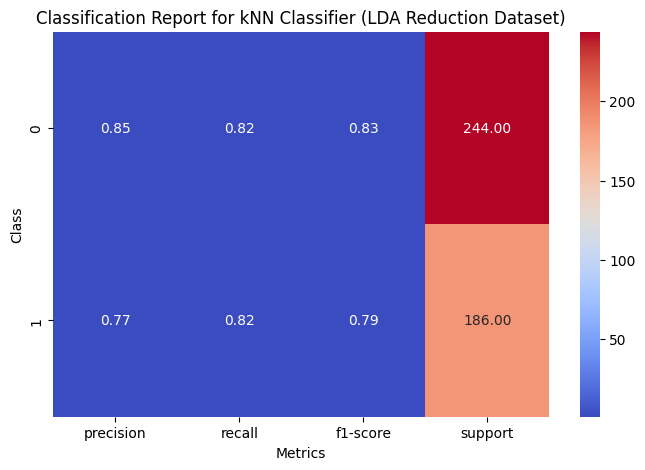

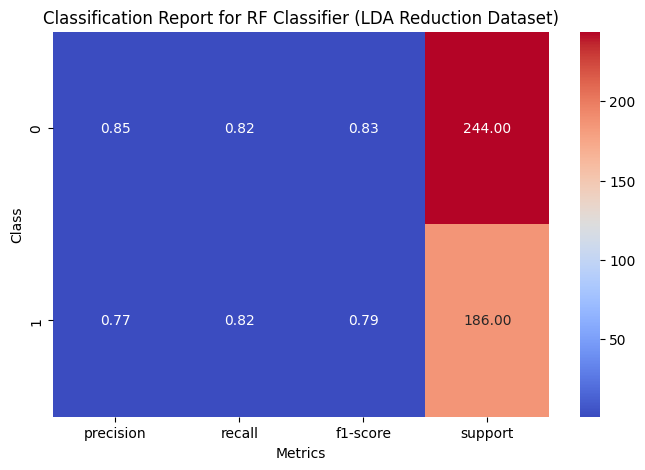

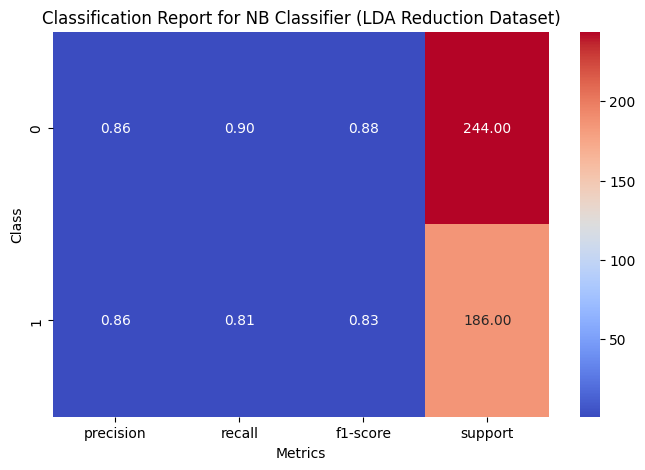

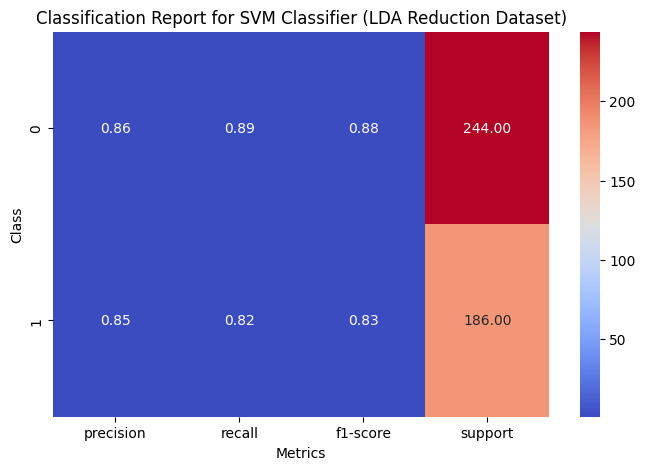

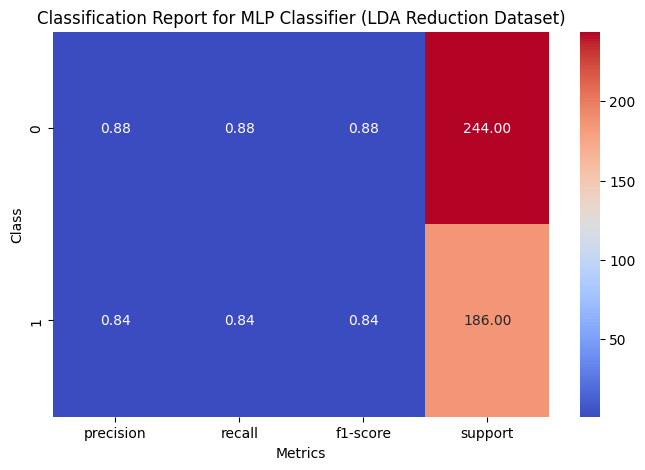


Classification Results for SMOTE Dataset:


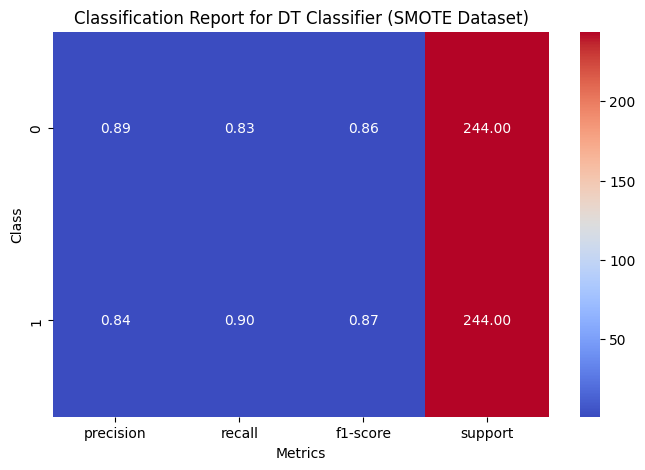

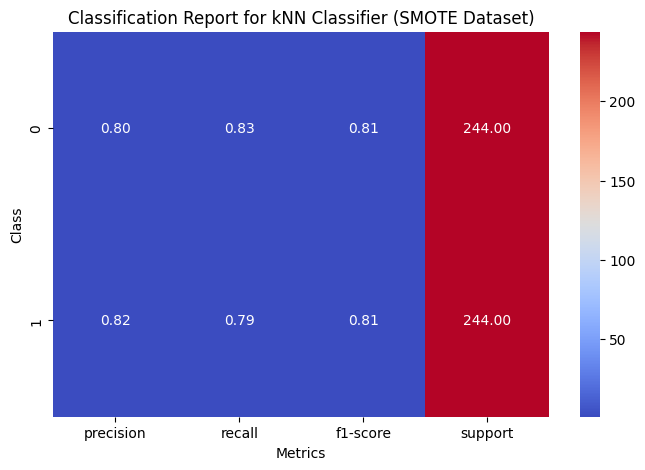

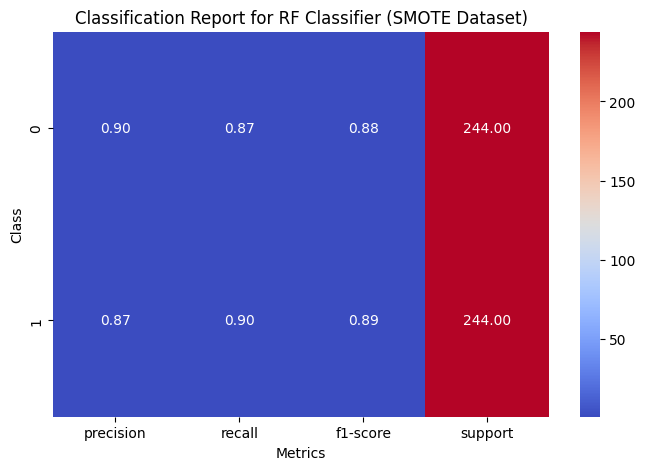

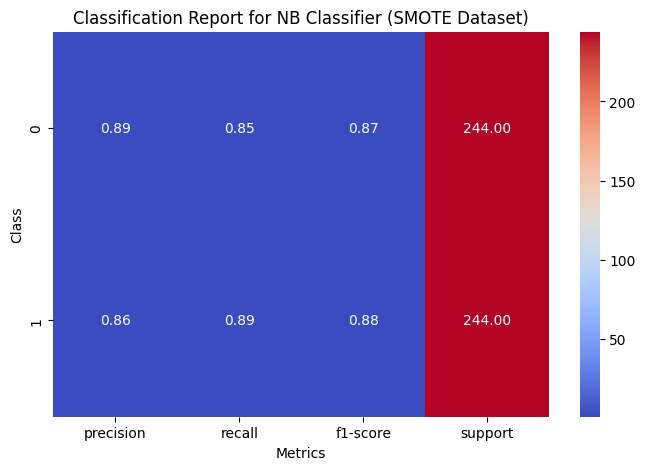

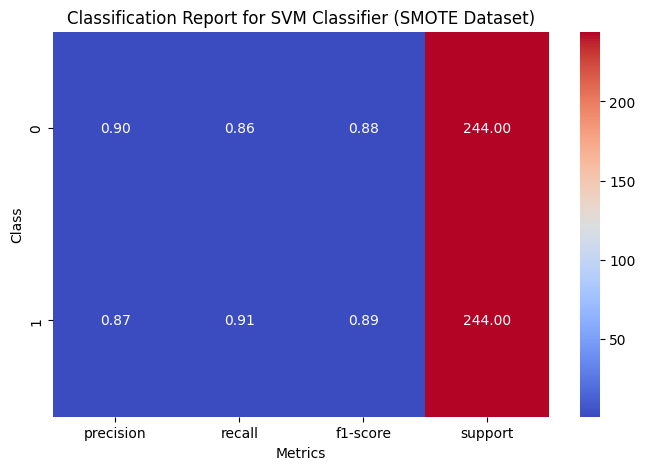

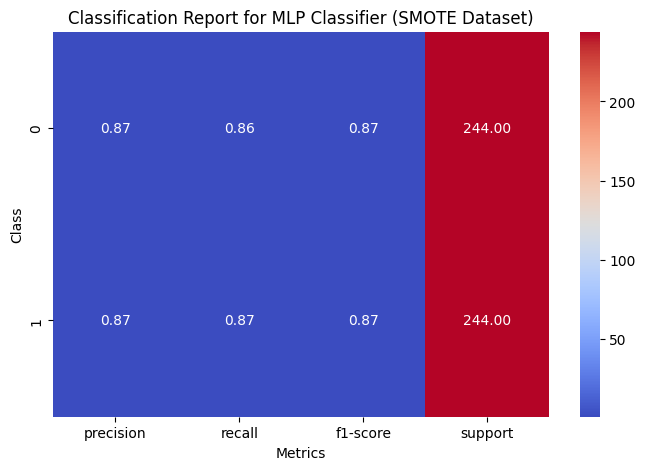

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to parse classification report string into a dictionary
def parse_classification_report(report_str):
    report_dict = {}
    lines = report_str.split('\n')
    for line in lines[2:-5]:  # Skip header and footer lines
        class_name, precision, recall, f1_score, support = line.split()
        report_dict[class_name] = {
            'precision': float(precision),
            'recall': float(recall),
            'f1-score': float(f1_score),
            'support': int(support)
        }
    return report_dict

# Assuming you have a dictionary `classification_results` containing classification reports
for dataset_name, classification_result in classification_results.items():
    print(f"\nClassification Results for {dataset_name} Dataset:")
    for classifier, report in classification_result.items():

        # Parse classification report string into dictionary
        report_dict = parse_classification_report(report)

        # Convert classification report dictionary to a DataFrame
        report_data = pd.DataFrame.from_dict(report_dict, orient='index')

        # Plot heatmap
        plt.figure(figsize=(8, 5))
        sns.heatmap(report_data, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Classification Report for {classifier} Classifier ({dataset_name} Dataset)')
        plt.xlabel('Metrics')
        plt.ylabel('Class')
        plt.show()



Clustering Results for Original Dataset:
Cluster Sizes - KMeans: [876 842], DBSCAN: [1718], EM: [1273  445]


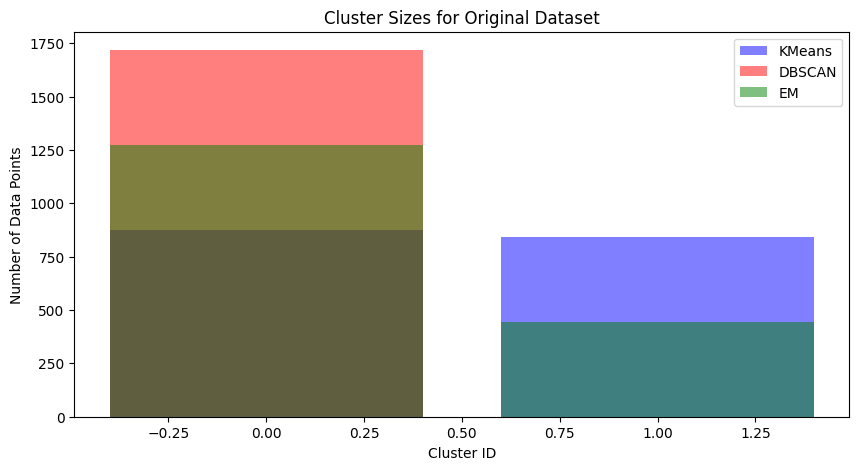


Clustering Results for Normalized Dataset:
Cluster Sizes - KMeans: [1167  551], DBSCAN: [   3 1715], EM: [1281  437]


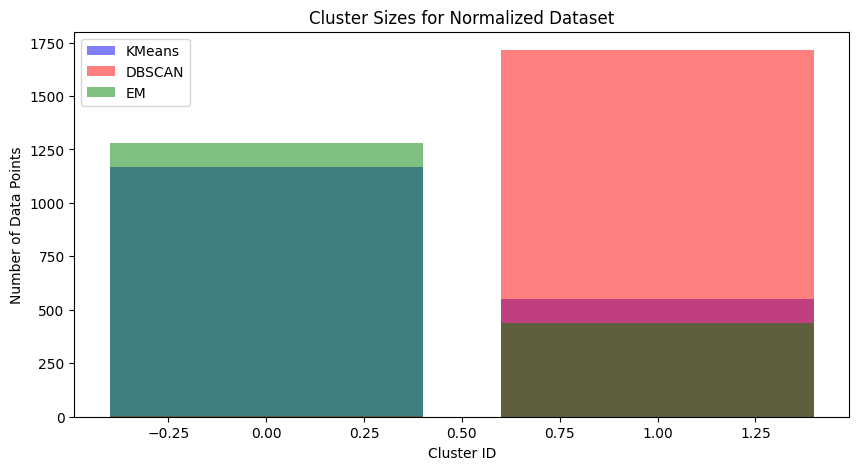


Clustering Results for Standardized Dataset:
Cluster Sizes - KMeans: [967 751], DBSCAN: [1088  550    5    7    6    7    6    4    6    4    6    7    5    5
    4    3    5], EM: [917 801]


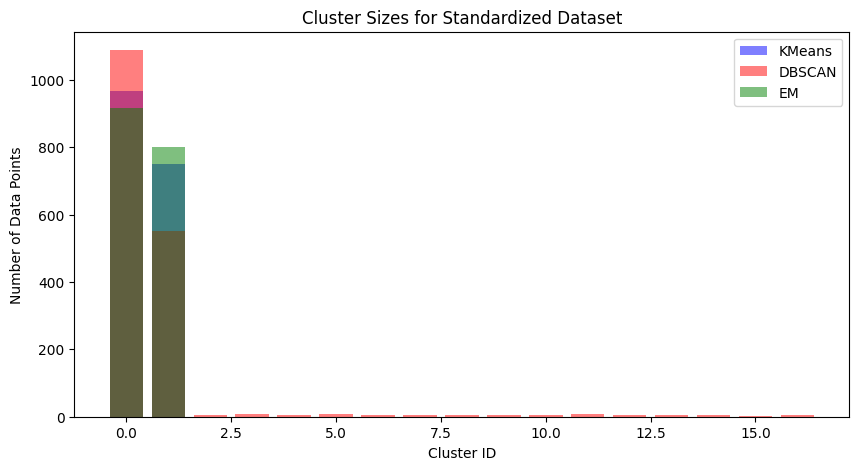


Clustering Results for PCA Reduction Dataset:
Cluster Sizes - KMeans: [747 971], DBSCAN: [ 290 1408    7    5    8], EM: [ 686 1032]


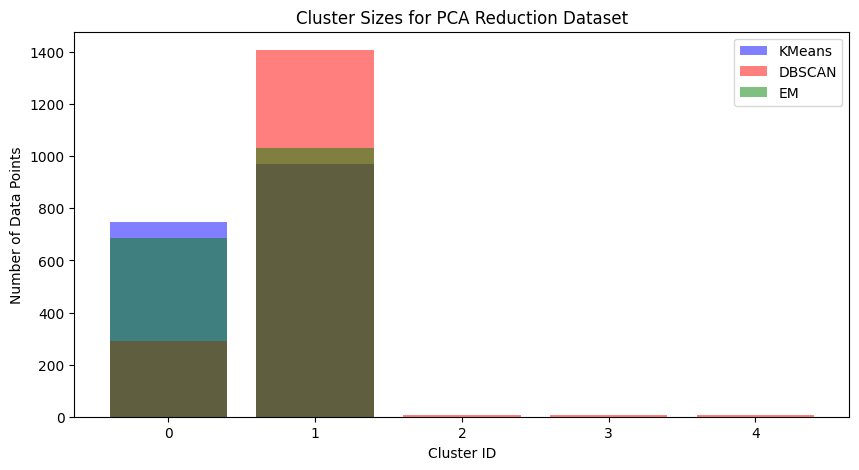


Clustering Results for LDA Reduction Dataset:
Cluster Sizes - KMeans: [1058  660], DBSCAN: [   0 1718], EM: [1106  612]


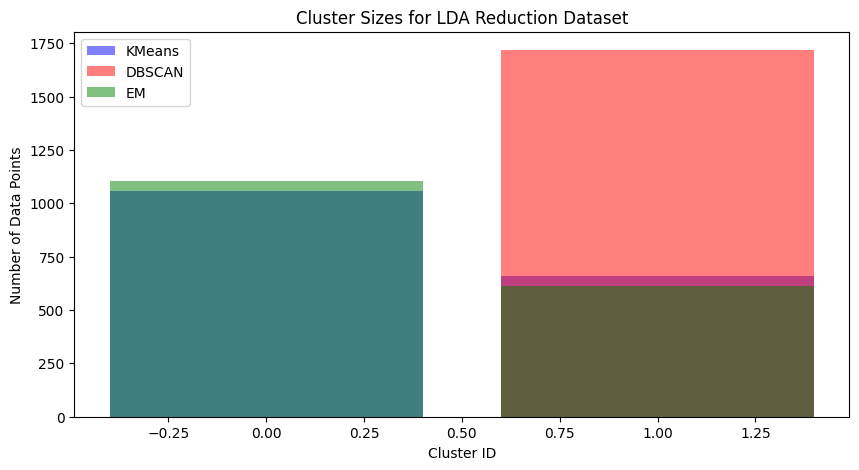


Clustering Results for SMOTE Dataset:
Cluster Sizes - KMeans: [ 961 1015], DBSCAN: [1088   15  707   13    5    7   12    9   14   12    6    7    6    9
    6   10    8    7    8    4    2    5    5    5    6], EM: [ 974 1002]


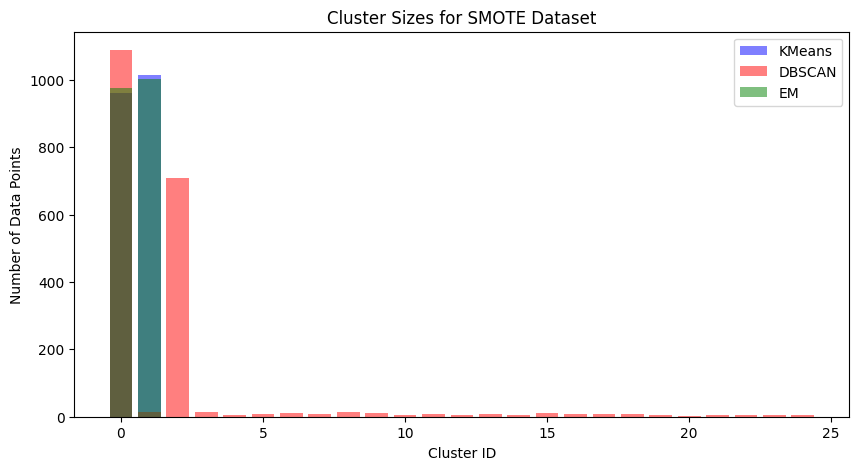

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Analyzing Clustering Results
for dataset_name, clustering_result in clustering_results.items():
    print(f"\nClustering Results for {dataset_name} Dataset:")

    # Assessing cluster sizes
    kmeans_cluster_sizes = np.bincount(clustering_result["KMeans"])
    dbscan_cluster_sizes = np.bincount(clustering_result["DBSCAN"] + 1)  # Adding 1 to include noise points
    em_cluster_sizes = np.bincount(clustering_result["EM"])

    print(f"Cluster Sizes - KMeans: {kmeans_cluster_sizes}, DBSCAN: {dbscan_cluster_sizes}, EM: {em_cluster_sizes}")

    # Plotting cluster sizes
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(kmeans_cluster_sizes)), kmeans_cluster_sizes, color='blue', alpha=0.5, label='KMeans')
    plt.bar(range(len(dbscan_cluster_sizes)), dbscan_cluster_sizes, color='red', alpha=0.5, label='DBSCAN')
    plt.bar(range(len(em_cluster_sizes)), em_cluster_sizes, color='green', alpha=0.5, label='EM')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Data Points')
    plt.title(f'Cluster Sizes for {dataset_name} Dataset')
    plt.legend()
    plt.show()
